In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#import scipy.io.wavfile
import scipy.ndimage as sp
#import calendar
#from PIL import Image
import PIL

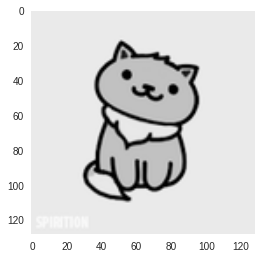

In [124]:
def opengreypil(filelocation):
    return Image.open(filelocation).convert('LA')

def rgbtogrey(img, convert=np.average):
    greyImg = np.array([[0] * img.shape[1]] * img.shape[0])
    for ix, x in enumerate(img):
        for iy, y in enumerate(x):
            greyImg[ix][iy] = convert(y)
    return 255 - greyImg
  

def printpicture(obj):
    fig = plt.figure(figsize=(4,4))
    plt.grid(False)
    plt.imshow(obj, vmin=0, vmax=255)
    
cat = rgbtogrey(sp.imread('./smol_cat.png'))
printpicture(cat)

In [69]:
col_cat = cat.reshape((-1,1))
print col_cat

[[39]
 [39]
 [39]
 ..., 
 [39]
 [39]
 [39]]


In [94]:
def col_vec_hist(v):
    d = {}
    for i in v:
        d[i[0]] = d.get(i[0], 0)+1

    histlist = []
    for i in d:
        histlist.append((i, d.get(i)))

    sorted(histlist)
    intensities = [i for (i,j) in histlist]
    frequencies = [j for (i,j) in histlist]
    return [intensities,frequencies]

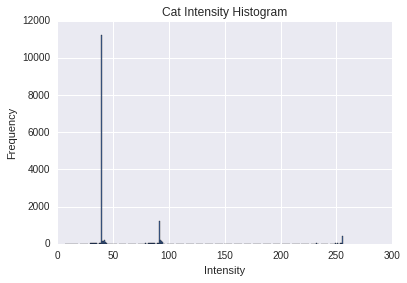

In [107]:
def print_cat_hist(v):
    [intensities, frequencies] = col_vec_hist(v)
    plt.bar(intensities, frequencies)
    plt.title("Cat Intensity Histogram")
    plt.xlabel("Intensity")
    #plt.xticks(np.arange(78-62+2)+62)
    plt.ylabel("Frequency")

    fig = plt.gcf()
print_cat_hist(col_cat)

In [93]:
mean = np.mean([i[0] for i in col_cat])
print mean

62.6928100586


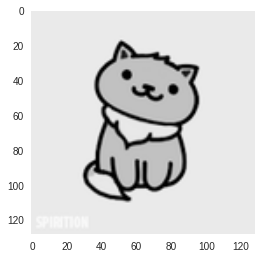

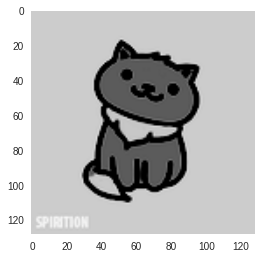

In [126]:
cat_darker = cat*2
col_cat_darker = cat_darker.reshape(-1,1)
#cat_darker = col_cat_darker.reshape((len(cat[0]),-1))
printpicture(cat)
printpicture(cat_darker)

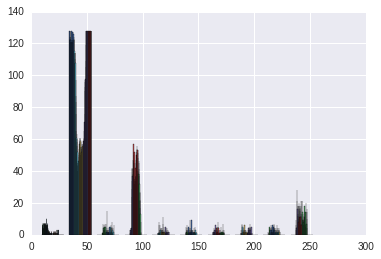

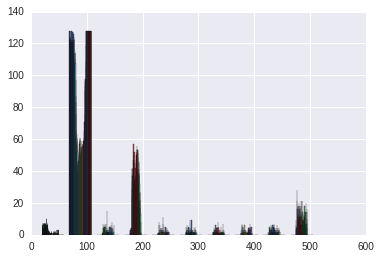

In [132]:
plt.hist(cat)
plt.show()
plt.hist(cat_darker)
plt.show()

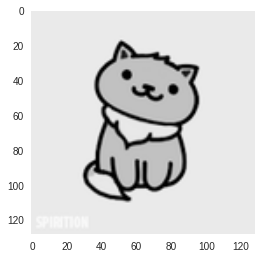

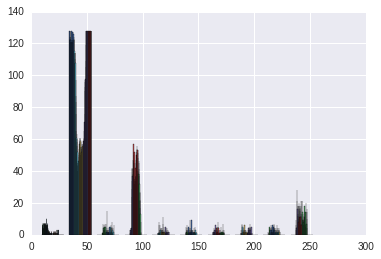

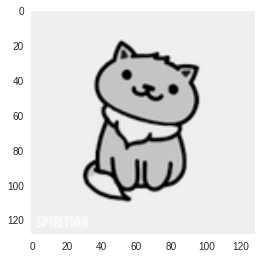

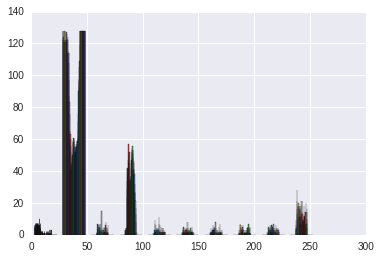

In [141]:
def linear_contrast_adjust(img):
    col_img = img.reshape(-1,1)
    maxpix = max([i[0] for i in col_img])
    minpix = min([i[0] for i in col_img])
    pixrange = maxpix - minpix
    adjusted_img = img*(255/pixrange)-minpix
    return adjusted_img

better_cat = linear_contrast_adjust(cat)
printpicture(cat)
plt.show()
plt.hist(cat)
plt.show()
printpicture(better_cat)
plt.show()
plt.hist(better_cat);
plt.show()

In [143]:
ferret_plague_vaccine = [[0,0,3],[1,0,1],[0,1,0],[1,1,6]]
finland_13_accidents = [[1,1,82,79.9],[1,2,2423,2483.7],[2,1,41,86.5],[2,2,789,2687.1]]
breast_implant_ruptures = [[0,0,63],[0,1,5],[1,0,28],[1,1,69]]

ferret_col = np.reshape(ferret_plague_vaccine,(-1,1))
implant_col = np.reshape(breast_implant_ruptures,(-1,1))
b = [[ferret_col[i],implant_col[i]] for i in range(len(ferret_col))]
ferret_mean = np.mean([i[0] for i in ferret_col])
ferret_stdDev = np.std([i[0] for i in ferret_col])
implant_mean = np.mean([i[0] for i in implant_col])
implant_stdDev = np.std([i[0] for i in implant_col])

a = []s